In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Final Project 

## Linear regression

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

Assume the **data generating process** is given by:

In [2]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

**The data you have access to is:**

In [3]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

**Question 1:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}$$

In [4]:
# define a np.array filled with 1
k = np.ones(10000)

In [5]:
# define transpose X
X_tran = np.array([k,x1,x2])
X_tran

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-1.76884571,  0.07555227, -1.1306297 , ...,  0.0370484 ,
         1.70892684,  2.06128052],
       [-0.18279442,  0.78062368, -1.01220533, ..., -1.44286811,
        -0.10668645,  0.55908184]])

In [6]:
# define X
X = X_tran.T
X

array([[ 1.        , -1.76884571, -0.18279442],
       [ 1.        ,  0.07555227,  0.78062368],
       [ 1.        , -1.1306297 , -1.01220533],
       ...,
       [ 1.        ,  0.0370484 , -1.44286811],
       [ 1.        ,  1.70892684, -0.10668645],
       [ 1.        ,  2.06128052,  0.55908184]])

In [7]:
#  X_tran times X
X_0 = X_tran@X 
X_0

array([[10000.        ,   113.94541841,  -122.56512591],
       [  113.94541841,  9798.04390975,    11.2824701 ],
       [ -122.56512591,    11.2824701 ,  9775.23283269]])

In [8]:
# inverse of x_0
inv_X0 = linalg.inv(X_0)
inv_X0

array([[ 1.00028660e-04, -1.16471953e-06,  1.25553697e-06],
       [-1.16471953e-06,  1.02074885e-04, -1.32417392e-07],
       [ 1.25553697e-06, -1.32417392e-07,  1.02315249e-04]])

In [9]:
# define transpose Y
Y_tran = np.array([y])
Y = Y_tran.T
Y

array([[-1.06458366],
       [ 0.58562919],
       [-0.91755295],
       ...,
       [-6.98529298],
       [ 0.08526139],
       [ 0.70458339]])

In [10]:
X_1= inv_X0@X_tran
X_1

array([[ 1.01859364e-04,  1.00920765e-04,  1.00074665e-04, ...,
         9.81739347e-05,  9.79042907e-05,  9.83297942e-05],
       [-1.81695237e-04,  6.44390174e-06, -1.16439583e-04, ...,
         2.80805278e-06,  1.73287919e-04,  2.09166221e-04],
       [-1.72128936e-05,  8.11152387e-05, -1.02158788e-04, ...,
        -1.46376779e-04, -9.88640486e-06,  5.81851856e-05]])

In [11]:
beta_tran = X_1@Y
beta = beta_tran.T
beta

array([[0.0956821 , 0.29294299, 0.50332771]])

**Question 2:** Construct a 3D plot, where the data is plotted as scattered points, and the prediction of the model is given by the plane
$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i}$$

In [12]:
# conver x1,x2 into numpy array 
x1 = np.array(x1)
x1

array([-1.76884571,  0.07555227, -1.1306297 , ...,  0.0370484 ,
        1.70892684,  2.06128052])

In [13]:
x2 = np.array(x2)
x2

array([-0.18279442,  0.78062368, -1.01220533, ..., -1.44286811,
       -0.10668645,  0.55908184])

In [14]:
# allocate numpy arrays
y_values = np.empty(10000)

In [15]:
for i in range(10000):
    y_values[i] = beta[0,0] + x1[i-1]*beta[0,1] + x2[i-1]*beta[0,2]

Text(0.5, 0, 'y values')

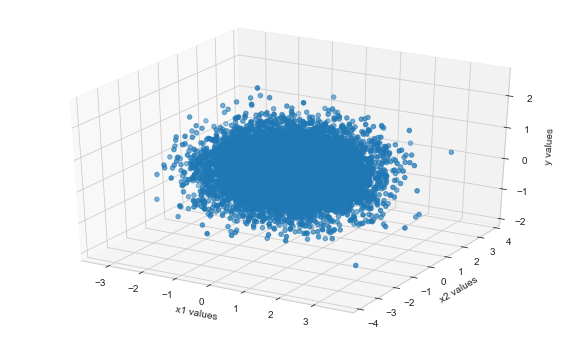

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y_values)

ax.set_xlabel('x1 values')
ax.set_ylabel('x2 values')
ax.set_zlabel('y values')

**Question 3:** Esimtate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using a **numerical solver** to solve the ordinary least square problem, shown below, directly. Compare your results with the matrix algebra results.

$$ \min_{\mathbf{\beta}} \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) )^2 $$

In [17]:
# define solve ols function to solve the ols minimization problem 
def solve_ols(covs,y,x1,x2):  # covs is the bundle of betas
    
    beta0 = covs[0]
    beta1 = covs[1]
    beta2 = covs[2]
    
    return np.sum((y-covs[0]-covs[1]*x1-covs[2]*x2)**2)

In [18]:
# make initial guess
initial_guess = [1,1,1]
# call the solver 
sol_0 = optimize.minimize(solve_ols, initial_guess, args=(y,x1,x2), method='Nelder-Mead')

In [19]:
# unpack solution
beta0 = sol_0.x[0]
beta1 = sol_0.x[1]
beta2 = sol_0.x[2]

In [20]:
#print 
print ("beta_0: ", beta0)
print ("beta_1: ", beta1)
print ("beta_2: ", beta2)

beta_0:  0.09566290429939789
beta_1:  0.2929141887678266
beta_2:  0.5033483614965212


**Question 4:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **least absolute deviations (LAD)** using a numerical solver to solve the following problem directly: 

$$  \min_{\beta} \sum^N_{i=1} |y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) | $$

where $|z|$ is the absolute value of $z$.

In [21]:
# define solve least abosolute deviations function 
def solve_lad(covs,y,x1,x2):  
    
    beta0 = covs[0]
    beta1 = covs[1]
    beta2 = covs[2]
    
    return np.sum(np.abs(y-covs[0]-covs[1]*x1-covs[2]*x2))

In [22]:
# make initial guess
initial_guess = [1,1,1]
# call the solver
sol_1 = optimize.minimize(solve_lad, initial_guess, args=(y,x1,x2), method='Nelder-Mead')

In [23]:
# unpack solution
beta0 = sol_1.x[0]
beta1 = sol_1.x[1]
beta2 = sol_1.x[2]

In [24]:
# print
print ("beta_0: ", beta0)
print ("beta_1: ", beta1)
print ("beta_2: ", beta2)

beta_0:  0.0922664465433316
beta_1:  0.30745193587867115
beta_2:  0.5115382176875958


**Question 5:** Set $N = 50$. Repeat the estimation using the **OLS** and **LAD** methods $K=5000$ times, drawing a new random sample from the data generating process each time. Compare the estimates from each method using histograms. Which method do you prefer? Explain your choice.

In [25]:
# using ols and lad method K = 5000 times
K = 5000
N0 = 50

# define empty arrays
beta0_ols = np.empty(K)
beta1_ols = np.empty(K)
beta2_ols = np.empty(K)

In [26]:
# create new arrays of x1,x2,y
for i in range(K):
    x1_0,x2_0,y_0 = DGP(N0)
    
    # define a function to solve ols estimation 
    def ols_0(cov_ols,x1_0,x2_0,y_0):
    
        beta0_ols = cov_ols[0]
        beta1_ols = cov_ols[1]
        beta2_ols = cov_ols[2]
    
        return np.sum((y_0-cov_ols[0]-cov_ols[1]*x1_0-cov_ols[2]*x2_0)**2)

    # make initial guess
    initial_guess = [1,1,1]
    # call the solver 
    sol_ols = optimize.minimize(ols_0, initial_guess, args=(x1_0,x2_0,y_0), method='Nelder-Mead')

    # unpack solution of betas for i in range 5000
    beta0_ols[i-1] = sol_ols.x[0]
    beta1_ols[i-1] = sol_ols.x[1]
    beta2_ols[i-1] = sol_ols.x[2]

I took similar approach for LAD methods

In [27]:
# define empty arrays for betas
beta0_lad = np.empty(K)
beta1_lad = np.empty(K)
beta2_lad = np.empty(K)

In [28]:
# obtain new arrays of x1,x2,y
for i in range(K):
    x1_0,x2_0,y_0 = DGP(N0)
    
    # define a function to solve lad
    def lad_0(cov_lad,x1_0,x2_0,y_0):
    
        beta0_lad = cov_lad[0]
        beta1_lad = cov_lad[1]
        beta2_lad = cov_lad[2]
    
        return np.sum(np.abs(y_0-cov_lad[0]-cov_lad[1]*x1_0-cov_ols[2]*x2_0))
    
    # call the solver
    initial_guess = [1,1,1]
    sol_lad = optimize.minimize(ols_0, initial_guess, args=(x1_0,x2_0,y_0),method='Nelder-Mead')
    
    #unpack solution of betas for i in range 5000
    beta0_lad[i-1] = sol_lad.x[0]
    beta1_lad[i-1] = sol_lad.x[1]
    beta2_lad[i-1] = sol_lad.x[2]

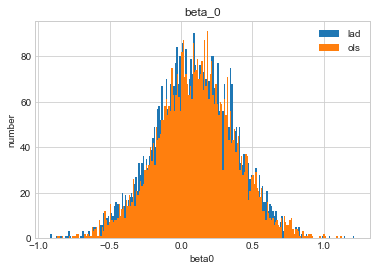

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(beta0_lad,bins=200,label='lad')
ax.hist(beta0_ols,bins=200,label='ols')

ax.legend()
ax.set_xlabel('beta0')
ax.set_ylabel('number')
ax.set_title('beta_0');

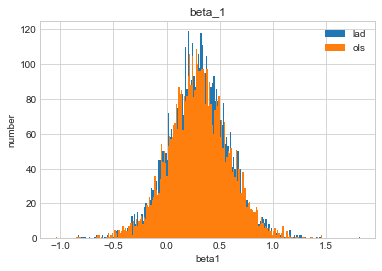

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(beta1_lad,bins=200,label='lad')
ax.hist(beta1_ols,bins=200,label='ols')

ax.legend()
ax.set_xlabel('beta1')
ax.set_ylabel('number')
ax.set_title('beta_1');

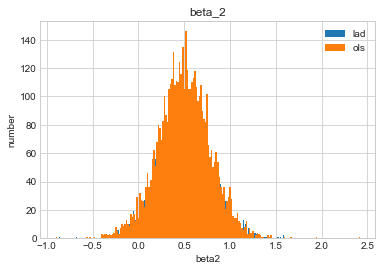

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(beta2_lad,bins=200,label='lad')
ax.hist(beta2_ols,bins=200,label='ols')

ax.legend()
ax.set_xlabel('beta2')
ax.set_ylabel('number')
ax.set_title('beta_2');

From the result the beta values through ols estimation is closer to the analytical result of beta values, thus more preferable

# Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

The **parameters** and **grids** for $m_1$, $m_2$ and $d$ should be:

In [32]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
r = 0.04
Delta = 0.25
chi = 0.9

# b. grids
m1_vec = np.linspace(1e-8,10,100)
m2_vec = np.linspace(1e-8,10,100)
d_vec = np.linspace(1e-8,5,100)

The **basic functions** are:

In [33]:
def v2(m2,c,d,chi,alpha,rho):
    """utility of consumption in period 2
    
    Args:
    m2(float): cash-on-hand in period 2 
    c (float): non-durable consumption in period 2 
    d (float): pre-committed durable consumption
    chi (float): depreciation rate of extra durable consumption
    x (float): extra durable consumption 
    alpha (float) : weight on non-durable consumption 
    rho (float): risk aversion coefficient
    
    Return:
    (float): utility of consumption in period2 
    
    """
    x = m2 - c
    return ((c**alpha*(d+chi*x)**(1-alpha))**(1-rho))/(1-rho)

def v1(m1,d,beta,r,Delta,v2_interp):
    """cash on hand in period 1
    
    Args:
    m1(float): cash on hand in period 1
    d(float): pre-committed durable consumption
    beta(float): discount factor
    r(float): return on saving
    Delta(float): level of income risk
    v2_interp: interpolator of period 2
    
    Return:
    (float): household value of period 1 
    """
    # v2 value at positive risk 
    m2_low = (1+r)*(m1-d) + 1 - Delta
    v1_low =  v2_interp([m2_low,d])[0]
    
    # v2 value at no risk 
    m2_medium = (1+r)*(m1-d) + 1 
    v1_medium = v2_interp([m2_medium,d])[0]
    
    # v2 value at negative risk 
    m2_high = (1+r)*(m1-d) + 1 + Delta
    v1_high = v2_interp([m2_high,d])[0]
    
    # expected value
    exp_v1 = v1_low*(1/3) + v1_medium*(1/3) + v1_high*(1/3)
    
    return beta*exp_v1

In [34]:
# define solve for period 2 function 
def solve_period_2 (chi,alpha,rho):
    # grid
    c_grid = np.empty((100,100))
    v2_grid = np.empty((100,100))
    
    # solve for each m2, d in grid
    for i,m2 in enumerate(m2_vec):
        for j, d in enumerate(d_vec):
            
            # objective function 
            obj = lambda c: -v2(m2,c,d,chi,alpha,rho)
            
            # initial value 
            x0 = m2*1/2
            
            # optimizer
            result = optimize.minimize(obj,[x0],method='L-BFGS-B',bounds=((1e-8,m2),))
            
            # save
            v2_grid[i,j] = -result.fun  # optimized value 
            c_grid[i,j] = result.x # input of minimizer 
            
    #return outsize for loop       
    return v2_grid,c_grid

**Question 1:** Find and plot the functions $v_{2}(m_{2},d)$, $c^{\ast}(m_2,d)$, and $x^{\ast}(m_2,d)$. Comment.

In [35]:
# solve
v2_grid,c_grid = solve_period_2 (chi,alpha,rho)

In [36]:
# grids
m2_grid,d_grid = np.meshgrid(m2_vec,d_vec,indexing='ij')

Text(0.5, 0, '$c^*$')

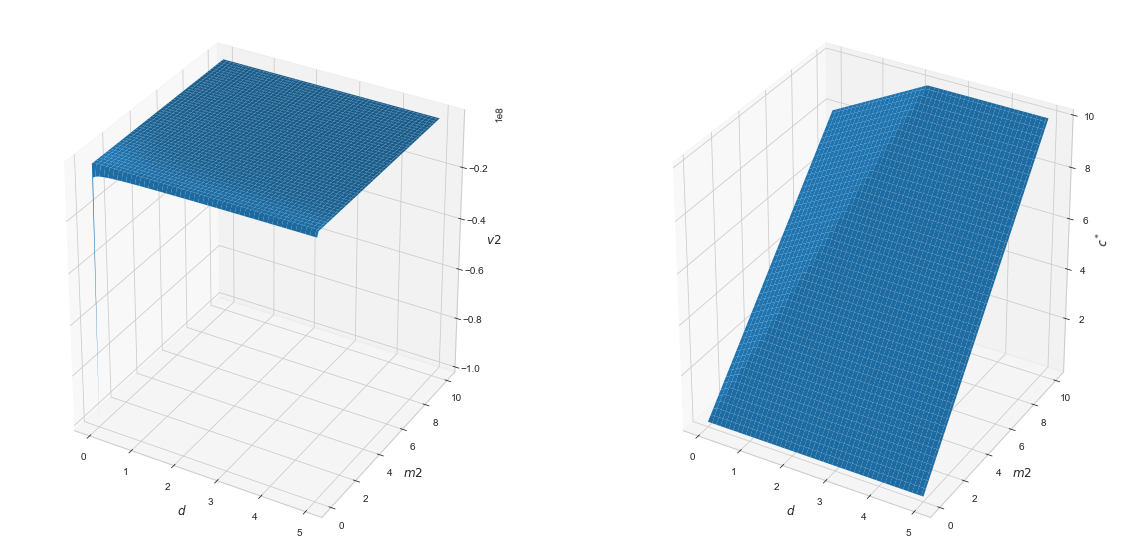

In [37]:
# c. main
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1,projection='3d')
cs = ax.plot_surface(d_grid,m2_grid,v2_grid)

# d. add labels
ax.set_xlabel('$d$',fontsize=12)
ax.set_ylabel('$m2$',fontsize=12)
ax.set_zlabel('$v2$',fontsize=12)

ax = fig.add_subplot(1,2,2,projection='3d')
cs = ax.plot_surface(d_grid,m2_grid,c_grid)
ax.set_xlabel('$d$',fontsize=12)
ax.set_ylabel('$m2$',fontsize=12)
ax.set_zlabel('$c^*$',fontsize=12)

**Question 2:** Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.

In [38]:
# define solve for period 1 function 
def solve_period_1(beta,r,Delta,v1,v2_interp):
    
    # grids
    v1_vec = np.empty(100) 
    d1_vec = np.empty(100)
    
    # solve for each m1 in grid 
    for i, m1 in enumerate(m1_vec):
           
        # objective function 
        obj = lambda d: -v1(m1,d,beta,r,Delta,v2_interp)
        
        # initial guess 
        d0 = m1*1/3
        
        # optimizer 
        result = optimize.minimize_scalar(obj,d0,method='bounded',bounds=[1e-8,m1])
        
        #save 
        d1_vec[i] = result.x
        v1_vec[i] = -result.fun
        
    return m1_vec,d1_vec,v1_vec

In [39]:
def solve(chi,alpha,rho,beta,r,Delta,v1):
    
    # a. solve period 2
    c2_grid,v2_grid = solve_period_2(chi,alpha,rho)
    
    # b. construct interpolator
    v2_interp = interpolate.RegularGridInterpolator((m2_vec,d_vec), v2_grid,
                                                    bounds_error=False,fill_value=None)
    
    # b. solve period 1
    m1_vec,d1_vec,v1_vec = solve_period_1(beta,r,Delta,v1,v2_interp)
    
    return m1_vec,d1_vec,v1_vec

In [40]:
m1_vec, d1_vec, v1_vec = solve(chi,alpha,rho,beta,r,Delta,v1)

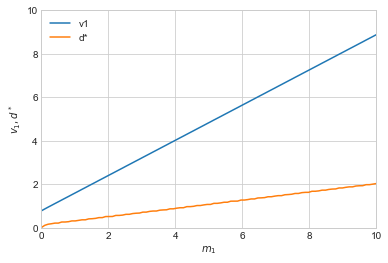

In [41]:
# d. plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(m1_vec,v1_vec,label='v1')
ax.plot(m1_vec,d1_vec,label='d*')
ax.set_xlabel('$m_1$')
ax.set_ylabel('$v_1,d^*$')
ax.set_xlim([0,10])
ax.set_ylim([0,10]);
ax.legend()

**Hint:** For interpolation of $v_2(m_2,d)$ consider using `interpolate.RegularGridInterpolator([GRID-VECTOR1,GRID-VECTOR2],VALUE-MATRIX,bounds_error=False,fill_value=None)`.

Next, consider an **extension** of the model, where there is also a **period 0**. In this period, the household makes a choice whether to stick with the level of durables it has, $z = 0$, or adjust its stock of durables, $z = 1$. If adjusting, the household loses a part of the value of its durable stock; more specificaly it incurs a proportional loss of $\Lambda \in (0,1)$.

Mathematically, the **household problem in period 0** is:

$$
\begin{aligned}
v_{0}(m_{0},d_{0}) &= \max_{z\in\{0,1\}} \begin{cases}
w(m_{0},d_{0}) & \text{if } z = 0\\
v_1(m_0+(1-\Lambda) d_{0}) & \text{if } z = 1\\
\end{cases}\\
\end{aligned}
$$

The **parameters** and **grids** for $m_0$ and $d_0$ should be:

In [42]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

**Question 3:** For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

first define values of household in period 0 in 2 cases (z=0 and z=1)

In [43]:
def v0_z0(m0,d0,beta,r,Delta,v2_interp):
    """cash on hand in period 0 with z=0
    
    Args:
    m0(float): cash in period 0 
    d0(float): durable consumption of period 0
    beta(float): discount factor 
    r(float): return on savings
    Delta(float): level of income risk
    v2_interp: interpolate from period 2
    
    Return:
    (float): household value of period 1 
    """
    # v0 value at positive risk 
    m2_low = (1+r)*(m0) + 1 - Delta
    v0_low =  v2_interp([m2_low,d0])[0]
    
    # v0 value at no risk 
    m2_medium = (1+r)*(m0) + 1 
    v0_medium = v2_interp([m2_medium,d0])[0]
    
    # v0 value at negative risk 
    m2_high = (1+r)*(m0) + 1 + Delta
    v0_high = v2_interp([m2_high,d0])[0]
    
    # expected value
    exp_v0 = v0_low*(1/3) + v0_medium*(1/3) + v0_high*(1/3)
    
    return beta*exp_v0

In [44]:
def v0_z1(d,m0,d0,beta,r,Delta,Lambda,v2_interp):
    """cash on hand in period 0 with z=1
    
    Args:
    m0(float): cash in period 0 
    d0(float): durable consumption of period 0
    d(float): durable consumption 
    beta(float): discount factor 
    r(float): return on savings
    Delta(float): level of income risk
    Lambda(float): proportional loss
    v2_interp: interpolate from period 2
    
    Return:
    (float):  household value of period 0
    """
    m1 = m0+(1-Lambda)*d0
    
    # v0 value at positive risk 
    m02_low = (1+r)*(m1-d) + 1 - Delta
    v00_low =  v2_interp([m02_low,d])[0]
    
    # v0 value at no risk 
    m02_medium = (1+r)*(m1-d) + 1 
    v00_medium = v2_interp([m02_medium,d])[0]
    
    # v0 value at negative risk 
    m02_high = (1+r)*(m1-d) + 1 + Delta
    v00_high = v2_interp([m02_high,d])[0]
    
    # expected value
    exp_v00 = v00_low*(1/3) + v00_medium*(1/3) + v00_high*(1/3)
    
    return beta*exp_v00


define solve functions to for solving the optimized value of period 0

In [45]:
def solve_v0_z0(beta,r,Delta,v1,v2_interp):

    v0_vec = np.empty(100) 
    
    # solve for each m0 in grid 
    for i, m0 in enumerate(m0_vec):
           
        # objective function 
        obj = lambda d: -v0_z0(m0,d0,beta,r,Delta,v2_interp)
        
        # initial guess 
        d0 = m0*1/3
        
        # optimizer 
        result = optimize.minimize_scalar(obj,d0,method='bounded',bounds=[1e-8,m0])
        
        #save 
        d_vec[i] = result.x
        v0_vec[i] = -result.fun
        
    return m0_vec,d0_vec,v0_vec

In [46]:
def solve_v0_z1(beta,r,Delta,Lambda,v1,v2_interp):
    
    v00_vec = np.empty(100)
    d00_vec = np.empty(100)
    dd_vec = np.empty(100)
    
    # solve for each m0 in grid 
    for i,m0 in enumerate(m0_vec):
        
        # objective function 
        obj = lambda x: -v0_z1(x[0],m0,x[1],beta,r,Delta,Lambda,v2_interp)
        
        # initial guess
        d1 = [m0*1/3, m0*1/3]
        bound = (1e-8,m0)
        bounds = (bound,bound)
        ineq_con = {'type':'ineq', 'fun': lambda x: m0-x[0]-x[1]} 
        
        # optimizer 
        result = optimize.minimize(obj,d1,method='SLSQP',bounds= bounds,constraints=[ineq_con])
        
        # save
        d00_vec[i] = result.x[1] # optimal value of d0
        v00_vec[i] = -result.fun  # optimal value of v0
        dd_vec[i] = result.x[0]   # optimal value of d
        
    return d00_vec,v00_vec,dd_vec

define solve functions for optimize values intertemporally 

In [47]:
# solve (solve_v0_z0 function)
def solve_0(chi,alpha,rho,beta,r,Delta,v1):
    
    # a. solve period 2
    c2_grid,v2_grid = solve_period_2(chi,alpha,rho)
    
    # b. construct interpolator
    v2_interp = interpolate.RegularGridInterpolator((m2_vec,d_vec), v2_grid,
                                                    bounds_error=False,fill_value=None)
    
    # b. solve period 0
    m0_vec,d0_vec,v0_vec = solve_v0_z0(beta,r,Delta,v1,v2_interp)
    
    return m0_vec,d0_vec,v0_vec

In [48]:
# call the solver for z=0
m0_vec, d0_vec, v0_vec = solve_0(chi,alpha,rho,beta,r,Delta,v1)

In [49]:
def solve_1(chi,alpha,rho,beta,r,Delta,Lambda,v1):
    
    # a. solve period 2
    c2_grid,v2_grid = solve_period_2(chi,alpha,rho)
    
    # b. construct interpolator
    v2_interp = interpolate.RegularGridInterpolator((m2_vec,d_vec), v2_grid,
                                                    bounds_error=False,fill_value=None)
    
    # b. solve period 0
    d00_vec,v00_vec,dd_vec = solve_v0_z1(beta,r,Delta,Lambda,v1,v2_interp)
    
    return d00_vec,v00_vec,dd_vec

In [50]:
# call the solver for z=1
d00_vec, v00_vec ,dd_vec = solve_1(chi,alpha,rho,beta,r,Delta,Lambda,v1)

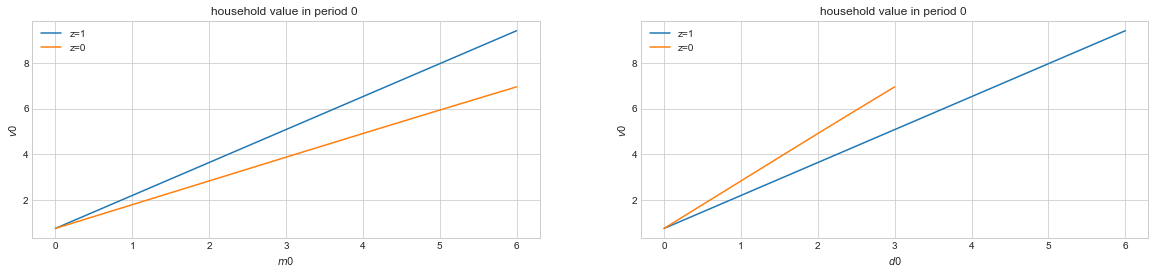

In [51]:
# plot v0,m0
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(1,2,1)
ax.plot(m0_vec,v00_vec,label='z=1')
ax.plot(m0_vec,v0_vec,label='z=0')
ax.set_xlabel('$m0$')
ax.set_ylabel('$v0$')
ax.set_title('household value in period 0 ')
ax.legend()

# plot d0,v0
ax = fig.add_subplot(1,2,2)
ax.plot(d00_vec,v00_vec,label='z=1')
ax.plot(d0_vec,v0_vec,label='z=0')
ax.set_xlabel('$d0$')
ax.set_ylabel('$v0$')
ax.set_title('household value in period 0 ')
ax.legend()

from the plots above, when m0 = 0, d0 smaller than 3, its better not to adjust

# Gradient descent

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

**Question:** Implement the algorithm above such that the code below can run.

**Optimizer function:**

In [52]:
def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):
    """ minimize function fx with gradient descent
        
    Args:

        f (callable): function
        x0 (np.ndarray): initial values
        epsilon(int): tolerance
        Theta (int): scale factor
        Delta (int): small number
        max_iter (float): tolerance
        
    Returns:
    
        x (np.ndarray): minimum
        n (int): number of iterations used
        
    """
    # 2.initialize 
    x = x0
    fx = f(x0)
    n = 1
    # set theta = Theta
    theta = Theta
    
    # iteration
    while n < max_iter:
        
        x_prev = x
        fx_prev = fx
        
        # 3. jacobian 
        a = f(x_prev + np.array([Delta, 0])) - fx_prev
        b = f(x_prev + np.array([0,Delta])) - fx_prev
        jac = (1/Delta)*np.array([a,b])
        fn = f(x_prev - theta*jac)
        
        # 6. compute fn_theta 
        if fn < fx_prev:             
            theta = theta*(1/2)
        
        x = x_prev - theta*jac
        fx = f(x)
        
        # 4. check convegence 
        if abs(a) < epsilon and abs(b) < epsilon:
            break
       
        #update x,n           
        n += 1
    
    return x,n



**Test case:**

In [53]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (0.9832,1.1440) after 1 iterations
not implemented yet
